# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [30]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [31]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [32]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [33]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [34]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

In [35]:
# podemos ver la descripción en ingles, mas abajo se hace una traducción aproximada se lo que se entiende.
# print(boston['DESCR'])

1- Boston es una ciudad de Massachusetts. Contiene datos estadísticos del precio de las casas y otros atributos que la caracterizan.

2- El objetivo es predecir el valor del precio de las casas usando otras características dadas. Que es la variable MEDV


3- Tenemos disponibles los siguientes atributos:
  + CRIM, tasa per cápita de crimenes
  + ZN, terrenos residenciales mayores a 2322 m2 (25000 sqr ft)
  + INDUS, negocios mayoristas por ciudad (industrias?)
  + CHAS, fronteras limitadas por ríos
  + NOX, concentración de óxido nítrico (en 10ppm)
  + RM, promedio de habitaciones por vivienda
  + AGE, proporción de propietarios con viviendas construídas antes de 1940
  + DIS distancia ponderada a 5 centros de empleo en Boston
  + RAD indice de accesibilidad por rutas radiales
  + TAX, impuesto a la propiedad
  + PTRATIO, alumnos por cada maestro
  + B, proporción de raza negra en la ciudad (suena racista esto)
  + LSTAT, % de clase baja de la población
  + MEDV (target) precio promedio de las casas


4- Los atributos que se podrían usar a priori son, INDUS, RM, TAX, DIS y LSTAT, pero puede haber otras. Abajo hacemos una correlación para analizar mas en detalle los resultados.

5- Hay atributos que pueden cambiar en el tiempo. Valuar las casos por el tipo de piel (no se si entedí bien) parece racismo...



## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'CRIM'),
  Text(1.5, 0, 'ZN'),
  Text(2.5, 0, 'INDUS'),
  Text(3.5, 0, 'CHAS'),
  Text(4.5, 0, 'NOX'),
  Text(5.5, 0, 'RM'),
  Text(6.5, 0, 'AGE'),
  Text(7.5, 0, 'DIS'),
  Text(8.5, 0, 'RAD'),
  Text(9.5, 0, 'TAX'),
  Text(10.5, 0, 'PTRATIO'),
  Text(11.5, 0, 'B'),
  Text(12.5, 0, 'LSTAT'),
  Text(13.5, 0, 'MEDV')])

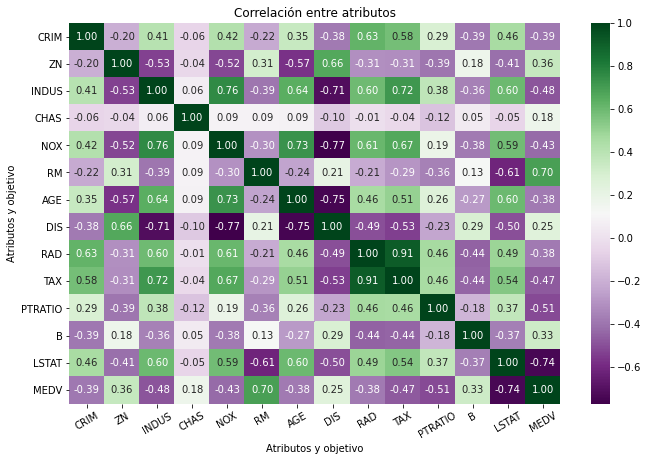

In [36]:
#vamos a graficar un mapa de calor con la correlación entre todos los atributos, target incluído
import seaborn as sns
import pandas as pd

#armamos dataset en pandas
dataset=pd.DataFrame(boston['data'],columns=boston['feature_names'])
dataset['MEDV']=boston['target']
dataset.describe()

plt.figure(figsize=(11,7))
sns.heatmap(dataset.corr(), annot=True, cmap="PRGn", fmt='.2f',
#             yticklabels=pd.to_datetime(exp.reset_index()['mes'], format='%m').dt.month_name().values
           )

plt.ylabel('Atributos y objetivo')
plt.xlabel('Atributos y objetivo')
plt.title('Correlación entre atributos')
plt.xticks(rotation=30)


Se puede observar rapidamente que correlación hay entre todos los atributos.  
La mejor corralación con MEDV la tienen RM (0.7) y LSTAT (-0.74).  
Por otro lado hay bastante correlación entre los atributos TAX y RAD (0.91), 
También hay buena correlación entre sí de DIS, INDUS, NOX y AGE. 

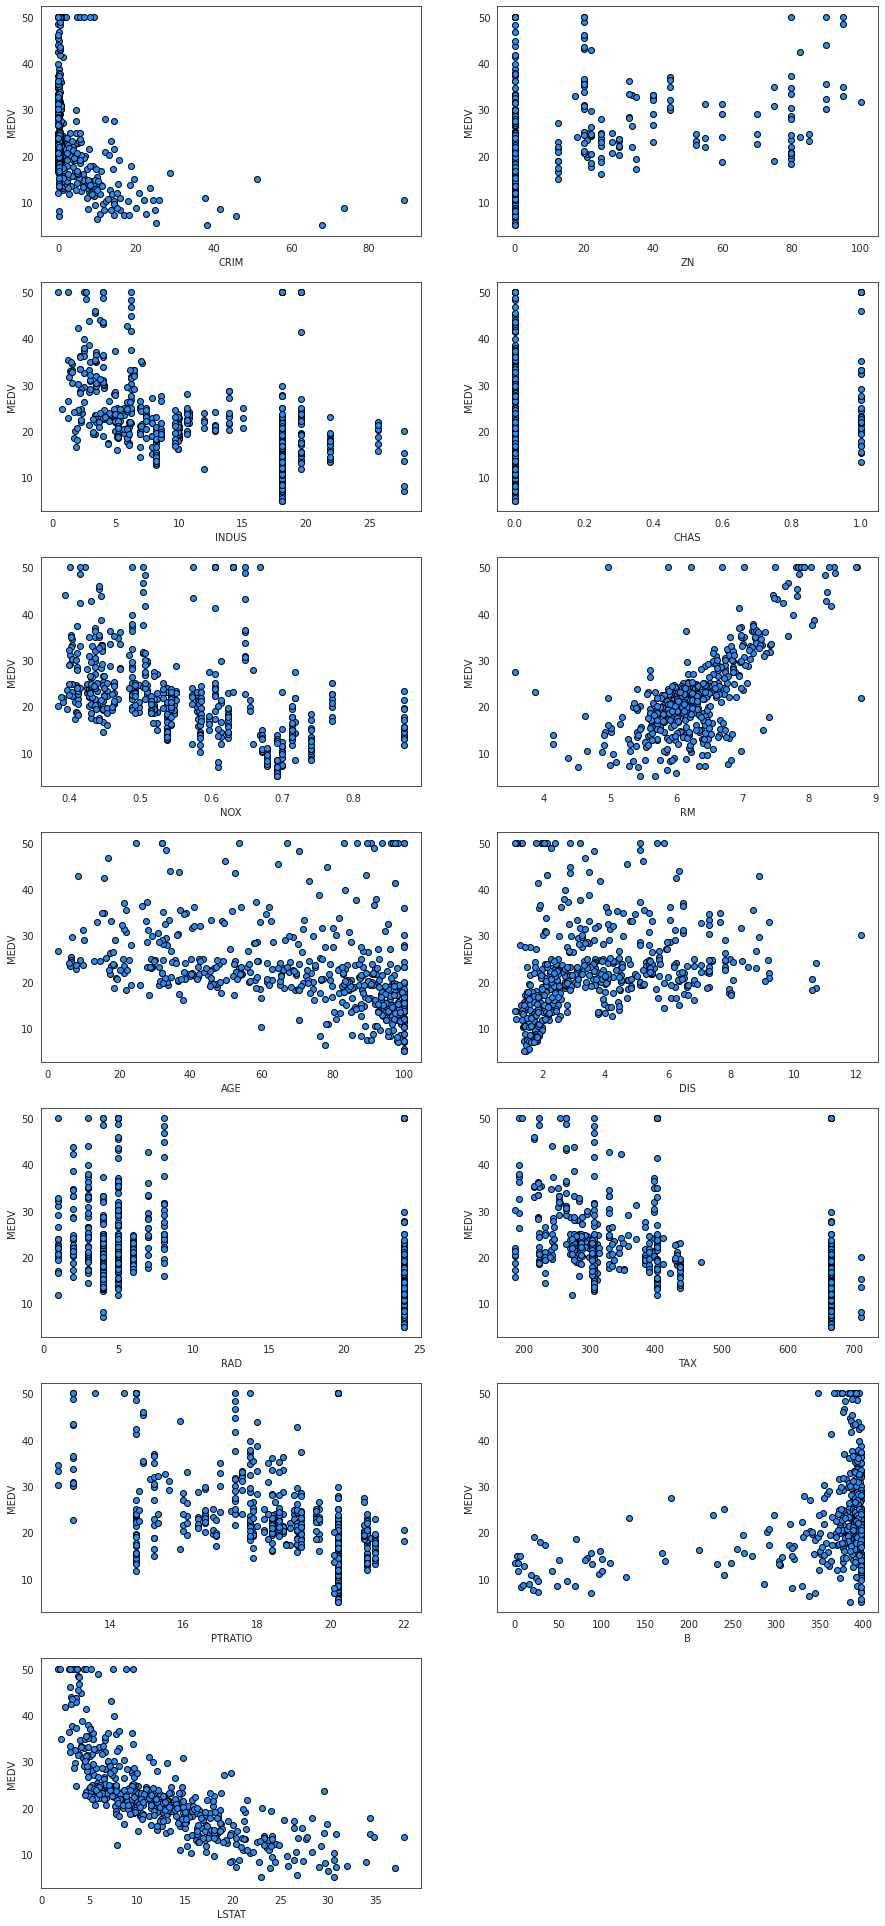

In [37]:
features = boston['feature_names']
fig = plt.figure(figsize=(15,5*len(features)))

with sns.axes_style("white"):
    for i, col in enumerate(features):
        sp1 = plt.subplot(len(features), 2, i+1)
        plt.scatter(dataset[col], dataset['MEDV'], marker='o', facecolor="dodgerblue", edgecolor="k")
#         plt.title("Correlación MEDV&{}".format(col))
        plt.xlabel(col)
        plt.ylabel('MEDV')

Al igual que el mapa de calor se puede observar que la mejor corralación con MEDV la tienen RM (0.7) y LSTAT (-0.74).  
Con una observación donde LSTAT pareciera tener un decaimiento exponencial.
Con aumento de contaminación NOX pareciera que el precio de la casas cae.

Usaría LSTAT y RM para el análisis.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [38]:
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [39]:
# 2. Instanciar y entrenar acá.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [41]:
# 3. Predecir y evaluar acá.

In [42]:
model.fit(X_train_f,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [43]:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2f}')
print(f'Test error: {test_error:.2f}')

Train error: 26.78
Test error: 37.22


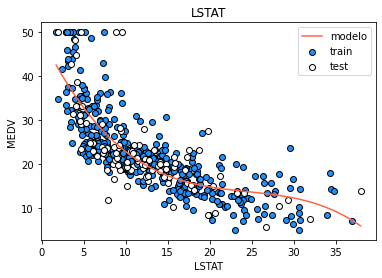

In [46]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.xlabel(feature)
plt.ylabel('MEDV')
plt.legend()
plt.show()

Para el atributo LSTAT (nivel socioeconómico de los propietarios) es de esperar un decaimiento de los precio de las casa a medida que vamos hacia la clase socioeconómica baja. Con este comentario considero que el mejor ajuste va a ser de grado impar 3 para mantener la pendiente negativa en los extremos  
Lo ideal pareciera ser un ajuste exponencial, de la forma: 
$MEDV = M*e^{(-k*LSTAT)} + C $  
, se podría repetir el experimento tomando el logaritmo de __MEDV__ y ajustar con una recta.  
Aunque con sklearn no creo que esto haga falta.. preguntar!

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [47]:
# 1. Resolver acá.

In [48]:
train_errors = []
test_errors = []
G_max = 15
degrees = np.linspace(0,G_max,G_max,dtype=int)
for degree in degrees:
    # A: train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    # B:
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

#C: print dataframe with errors
df_error = pd.DataFrame(degrees,columns=['degree'])
df_error['train_error'] = train_errors
df_error['test_error'] = test_errors
df_error.round(1).set_index('degree')


,train_error,test_error
degree,,
0,85.1,81.6
1,36.5,46.3
2,28.2,38.8
3,26.8,37.2
4,25.8,34.7
5,25.0,34.8
6,25.0,34.3
7,25.0,34.3
8,24.8,36.4


In [49]:
# 2. Graficar curvas de error acá.

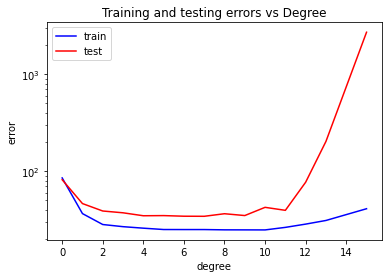

In [50]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.title('Training and testing errors vs Degree')
plt.xlabel("degree")
plt.ylabel("error")
plt.yscale('log')
plt.show()

El sobreajuste comienza a partir del orden 9

In [51]:
# 4. Reconstruir mejor modelo acá y graficar.

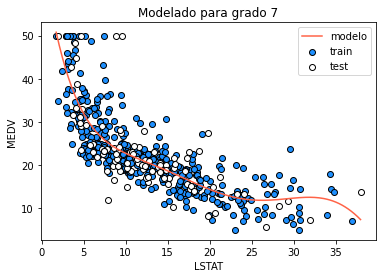

In [52]:
degree = 7
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f,y_train)

# Grafico
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="w", edgecolor="k", label="test")
plt.title("Modelado para grado {}".format(degree))
plt.xlabel(feature)
plt.ylabel('MEDV')
plt.legend()
plt.show()

Si bien el modelado con grado 7 tiene menor error, considero que el grado 3 es el más optimo porque impide que haya pendiente positiva. Esto último es una opinión personal desde la lógica de lo esperado, donde personas de bajo nivel socioeconómico vivan o tengan casas de menor valor.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [53]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'NOX')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [54]:
# 2. Resolver acá.

In [55]:
train_errors = []
test_errors = []
G_max = 10
degrees = np.linspace(1,G_max,G_max,dtype=int)
for degree in degrees:
    # A: train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # B:
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

#C: print dataframe with errors
df_error = pd.DataFrame(degrees,columns=['degree'])
df_error['train_error'] = train_errors
df_error['test_error'] = test_errors
df_error.round(1).set_index('degree')


,train_error,test_error
degree,,
1,28.6,38.1
2,16.1,26.3
3,12.3,30.1
4,9.7,28.6
5,11.8,43.9
6,7.7,176.8
7,6.5,658.5
8,6.8,1459.6
9,6.2,4303.7


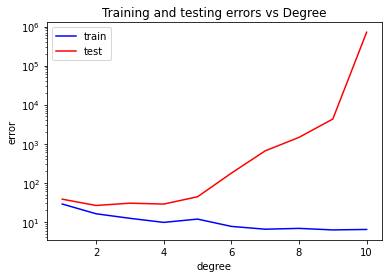

In [56]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.title('Training and testing errors vs Degree')
plt.xlabel("degree")
plt.ylabel("error")
plt.yscale('log')
plt.show()

Considero que el de grado 2 da mejores resultados. Aunque no se observa una mejora una mejora sustancial, supongo que es porque el primer atributo tomado es el de mayor correlación.  
Para los datos del entrenamiento en los grados superiores tenemos mejores resultados, pero para los datos de testeo empeora muchísimo!.


## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.


In [57]:
%%time
train_errors = []
test_errors = []
G_max = 8
degrees = np.linspace(1,G_max,G_max,dtype=int)
for degree in degrees:
    print(f"entrenando grado {degree}...")

    # A: train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # B:
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

#C: print dataframe with errors
df_error = pd.DataFrame(degrees,columns=['degree'])
df_error['train_error'] = train_errors
df_error['test_error'] = test_errors
df_error.round(3).set_index('degree')

entrenando grado 1...
entrenando grado 2...
entrenando grado 3...
entrenando grado 4...
entrenando grado 5...
entrenando grado 6...
entrenando grado 7...
entrenando grado 8...
Wall time: 16.6 s


,train_error,test_error
degree,,
1,19.326,33.449
2,6.310,25.216
3,0.000,1050370.508
4,0.000,981357.442
5,0.000,200225.488
6,0.000,200922.255
7,0.000,24855.358
8,0.000,173598.256


El resultado por encima del grado 2, el entrenamiento es perfecto pero diverge completamente con los datos de testeo. El hasta el grado 2 es aceptable.

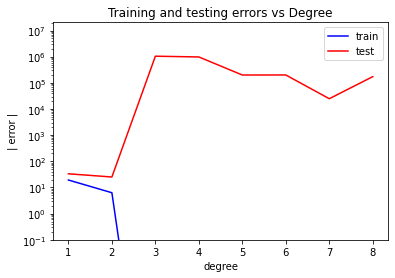

In [58]:
plt.plot(degrees, df_error['train_error'], color="blue", label="train")
plt.plot(degrees, df_error['test_error'], color="red", label="test")
plt.legend()
plt.title('Training and testing errors vs Degree')
plt.xlabel("degree")
plt.ylabel("| error |")
plt.yscale('log')
plt.ylim(0.1,)
plt.show()

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?